# Промышленность 

Чтобы оптимизировать производственные расходы, металлургический комбинат ООО «Так закаляем сталь» решил уменьшить потребление электроэнергии на этапе обработки стали. Вам предстоит построить модель, которая предскажет температуру стали.

### Описание этапа обработки

Сталь обрабатывают в металлическом ковше вместимостью около 100 тонн. Чтобы ковш выдерживал высокие температуры, изнутри его облицовывают огнеупорным кирпичом. Расплавленную сталь заливают в ковш и подогревают до нужной температуры графитовыми электродами. Они установлены в крышке ковша. 

Из сплава выводится сера (десульфурация), добавлением примесей корректируется химический состав и отбираются пробы. Сталь легируют — изменяют её состав — подавая куски сплава из бункера для сыпучих материалов или проволоку через специальный трайб-аппарат (англ. tribe, «масса»).

Перед тем как первый раз ввести легирующие добавки, измеряют температуру стали и производят её химический анализ. Потом температуру на несколько минут повышают, добавляют легирующие материалы и продувают сплав инертным газом. Затем его перемешивают и снова проводят измерения. Такой цикл повторяется до достижения целевого химического состава и оптимальной температуры плавки.

Тогда расплавленная сталь отправляется на доводку металла или поступает в машину непрерывной разливки. Оттуда готовый продукт выходит в виде заготовок-слябов (англ. *slab*, «плита»).

### Описание данных и считывание датасетов:

Данные состоят из файлов, полученных из разных источников:

- `data_arc_new.csv` — данные об электродах;
- `data_bulk_new.csv` — данные о подаче сыпучих материалов (объём);
- `data_bulk_time_new.csv` *—* данные о подаче сыпучих материалов (время);
- `data_gas_new.csv` — данные о продувке сплава газом;
- `data_temp_new.csv` — результаты измерения температуры;
- `data_wire_new.csv` — данные о проволочных материалах (объём);
- `data_wire_time_new.csv` — данные о проволочных материалах (время).

Во всех файлах столбец `key` содержит номер партии. В файлах может быть несколько строк с одинаковым значением `key`: они соответствуют разным итерациям обработки.

In [1]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor, cv
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor


In [3]:
random_state = 220523

#### Считываем данные об электродах

In [4]:
pth1 = "D:/YP/final/data_arc_new.csv"
pth2 = "/datasets/data_arc_new.csv"

if os.path.exists(pth1):
    data_arc = pd.read_csv(pth1)
elif os.path.exists(pth2):
    data_arc = pd.read_csv(pth2)
else:
    print('Something is wrong')

#### Считываем данные о подаче сыпучих материалов(объём)

In [5]:
pth1 = "D:/YP/final/data_bulk_new.csv"
pth2 = "/datasets/data_bulk_new.csv"

if os.path.exists(pth1):
    data_bulk = pd.read_csv(pth1)
elif os.path.exists(pth2):
    data_bulk = pd.read_csv(pth2)
else:
    print('Something is wrong')

#### Считываем данные о подаче сыпучих материалов(время)

In [6]:
pth1 = "D:/YP/final/data_bulk_time_new.csv"
pth2 = "/datasets/data_bulk_time_new.csv"

if os.path.exists(pth1):
    data_bulk_time = pd.read_csv(pth1)
elif os.path.exists(pth2):
    data_bulk_time = pd.read_csv(pth2)
else:
    print('Something is wrong')

#### Считываем данные о продувке сплава газом

In [7]:
pth1 = "D:/YP/final/data_gas_new.csv"
pth2 = "/datasets/data_gas_new.csv"

if os.path.exists(pth1):
    data_gas = pd.read_csv(pth1)
elif os.path.exists(pth2):
    data_gas = pd.read_csv(pth2)
else:
    print('Something is wrong')

#### Считываем результаты измерения температуры

In [8]:
pth1 = "D:/YP/final/data_temp_new.csv"
pth2 = "/datasets/data_temp_new.csv"

if os.path.exists(pth1):
    data_temp = pd.read_csv(pth1)
elif os.path.exists(pth2):
    data_temp = pd.read_csv(pth2)
else:
    print('Something is wrong')

#### Считываем данные о проволочных материалах (объём)

In [9]:
pth1 = "D:/YP/final/data_wire_new.csv"
pth2 = "/datasets/data_wire_new.csv"

if os.path.exists(pth1):
    data_wire = pd.read_csv(pth1)
elif os.path.exists(pth2):
    data_wire = pd.read_csv(pth2)
else:
    print('Something is wrong')

#### Считываем данные о проволочных материалах (время)

In [10]:
pth1 = "D:/YP/final/data_wire_time_new.csv"
pth2 = "/datasets/data_wire_time_new.csv"

if os.path.exists(pth1):
    data_wire_time = pd.read_csv(pth1)
elif os.path.exists(pth2):
    data_wire_time = pd.read_csv(pth2)
else:
    print('Something is wrong')

## Исследовательский анализ

Устройство ковша:

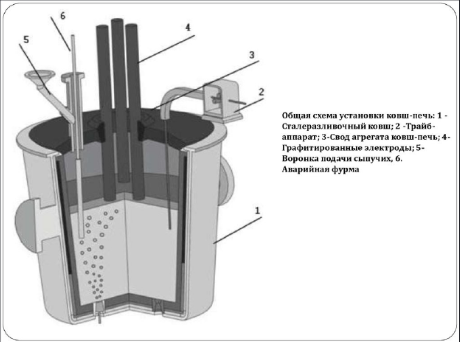



### Анализ датафрейма `data_arc` - данные об электродах;

In [11]:
data_arc.head(10)

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691
5,2,2019-05-03 11:34:14,2019-05-03 11:36:31,0.381124,0.220351
6,2,2019-05-03 11:38:50,2019-05-03 11:44:28,0.261665,0.205527
7,2,2019-05-03 11:46:19,2019-05-03 11:48:25,0.710297,0.484962
8,2,2019-05-03 11:49:48,2019-05-03 11:53:18,0.786322,0.542517
9,3,2019-05-03 12:06:54,2019-05-03 12:11:34,1.101678,0.820856


Первым делом изменим название признаков на более читаемые

In [12]:
data_arc.rename(columns={'key' : 'key',
                         'Начало нагрева дугой' : 'arc_begin',
                         'Конец нагрева дугой' : 'arc_end',
                         'Активная мощность' : 'active_power',
                         'Реактивная мощность' : 'reactive_power'

}, inplace=True)

In [13]:
data_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   key             14876 non-null  int64  
 1   arc_begin       14876 non-null  object 
 2   arc_end         14876 non-null  object 
 3   active_power    14876 non-null  float64
 4   reactive_power  14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


Так как у двух столбцов с датами стоит тип `object`, то изменим его на 

In [14]:
data_arc['arc_begin'] = pd.to_datetime(data_arc['arc_begin'], format='%Y-%m-%dT%H:%M:%S')
data_arc['arc_end'] = pd.to_datetime(data_arc['arc_end'], format='%Y-%m-%dT%H:%M:%S')

Проверим на наличие пропущенных значений:

In [15]:
data_arc.isna().sum()

key               0
arc_begin         0
arc_end           0
active_power      0
reactive_power    0
dtype: int64

Проверим на явных дубликаты:

In [16]:
data_arc.duplicated().sum()

0

Посмотрим на гистограммы данных и присутствуют ли выбросы:

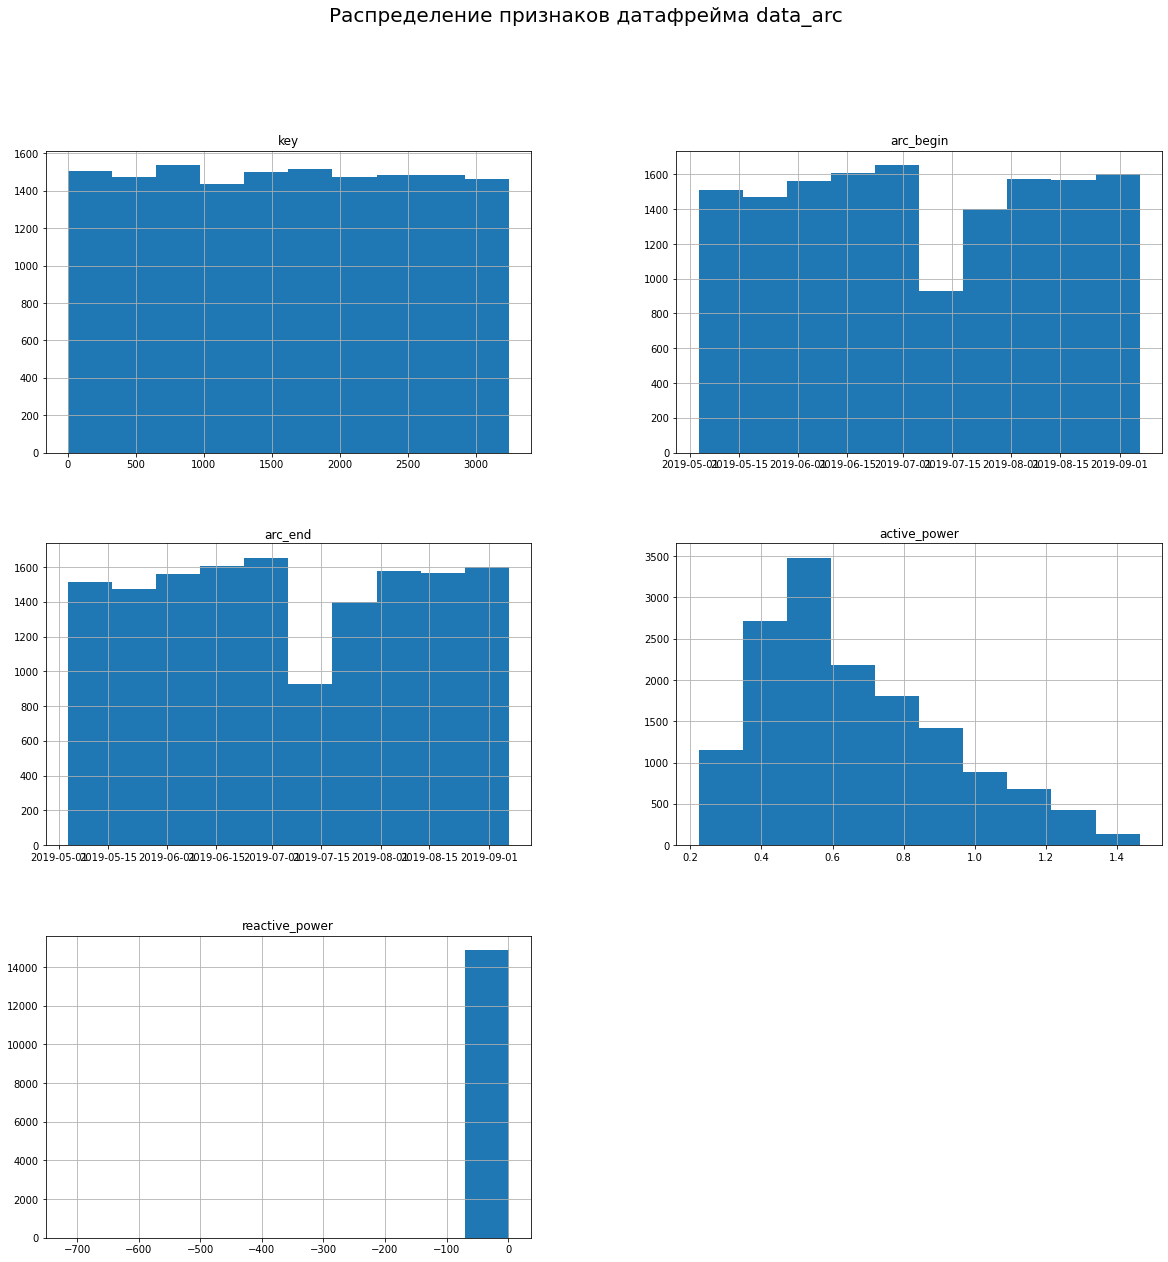

In [17]:
data_arc.hist(grid=True, figsize=(20,20))
plt.suptitle("Распределение признаков датафрейма data_arc", fontsize =20)
plt.show()

In [18]:
data_arc.describe()


,key,active_power,reactive_power
count,14876.000000,14876.000000,14876.000000
mean,1615.220422,0.662752,0.438986
std,934.571502,0.258885,5.873485
min,1.000000,0.223120,-715.479924
25%,806.000000,0.467115,0.337175
50%,1617.000000,0.599587,0.441639
75%,2429.000000,0.830070,0.608201
max,3241.000000,1.463773,1.270284


In [19]:
data_arc.reactive_power.describe()

count    14876.000000
mean         0.438986
std          5.873485
min       -715.479924
25%          0.337175
50%          0.441639
75%          0.608201
max          1.270284
Name: reactive_power, dtype: float64

In [20]:
data_arc.nunique()

key                3214
arc_begin         14876
arc_end           14876
active_power      13846
reactive_power    14707
dtype: int64

Реактивная мощность выглядит странно. Есть аномальное значение, которое отрицательное и сильно большое относительно среднего. Скорее всего данное значение появилось из-за сбоя.

Здесь нам дана активная и реактивная мощность, поэтому можно найти полную мощность по  формуле 1:

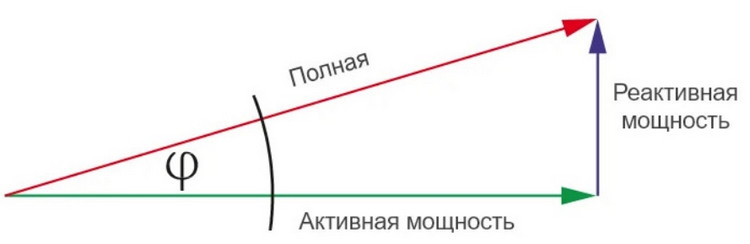

Формула полной мощности:
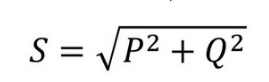 (1)

Из-за того, что посчитаем полную мощность, появится сильная корреляция признаков. Но, сильная корреляция будет и у активной с реактивной мощностью. То тогда выходом будет, создания нового признака полной мощности и удаления других мощностей. Надо будет проверить их корреляцию, после предобработки.

#### Вывод по `data_arc`

В ходе анализа:

- загрузил датасет data_arc;
- переименовал столбцы;
- проверил количество пропусков, пропусков не оказалось;
- проверил количествово дубликатов, дубликатов не оказалось;
- проверил количество уникальных значений;
- построил графики параметров и убедился в том, что данные распределены нормально.

### Анализ датафрейма `data_bulk` — данные о подаче сыпучих материалов (объём);

In [21]:
data_bulk.head(10)

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0
5,6,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,201.0,154.0
6,7,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.0,NaN,152.0,154.0
7,8,NaN,NaN,NaN,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,410.0,NaN,252.0,153.0
8,9,NaN,NaN,NaN,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.0,NaN,99.0,203.0
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,102.0,204.0


In [22]:
data_bulk.rename(columns = {'Bulk 1':'bulk_1',
                           'Bulk 2':'bulk_2',
                           'Bulk 3':'bulk_3',
                           'Bulk 4':'bulk_4',
                           'Bulk 5':'bulk_5',
                           'Bulk 6':'bulk_6',
                           'Bulk 7':'bulk_7',
                           'Bulk 8':'bulk_8',
                           'Bulk 9':'bulk_9',
                           'Bulk 10':'bulk_10',
                           'Bulk 11':'bulk_11',
                           'Bulk 12':'bulk_12',
                           'Bulk 13':'bulk_13',
                           'Bulk 14':'bulk_14',
                           'Bulk 15':'bulk_15',
                            }, inplace = True)

In [23]:
data_bulk.describe()

,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15
count,3129.000000,252.000000,22.000000,1298.000000,1014.000000,77.000000,576.000000,25.000000,1.0,19.000000,176.000000,177.000000,2450.000000,18.000000,2806.000000,2248.000000
mean,1624.383509,39.242063,253.045455,113.879045,104.394477,107.025974,118.925347,305.600000,49.0,76.315789,83.284091,76.819209,260.471020,181.111111,170.284747,160.513345
std,933.337642,18.277654,21.180578,75.483494,48.184126,81.790646,72.057776,191.022904,NaN,21.720581,26.060347,59.655365,120.649269,46.088009,65.868652,51.765319
min,1.000000,10.000000,228.000000,6.000000,12.000000,11.000000,17.000000,47.000000,49.0,63.000000,24.000000,8.000000,53.000000,151.000000,16.000000,1.000000
25%,816.000000,27.000000,242.000000,58.000000,72.000000,70.000000,69.750000,155.000000,49.0,66.000000,64.000000,25.000000,204.000000,153.250000,119.000000,105.000000
50%,1622.000000,31.000000,251.500000,97.500000,102.000000,86.000000,100.000000,298.000000,49.0,68.000000,86.500000,64.000000,208.000000,155.500000,151.000000,160.000000
75%,2431.000000,46.000000,257.750000,152.000000,133.000000,132.000000,157.000000,406.000000,49.0,70.500000,102.000000,106.000000,316.000000,203.500000,205.750000,205.000000
max,3241.000000,185.000000,325.000000,454.000000,281.000000,603.000000,503.000000,772.000000,49.0,147.000000,159.000000,313.000000,1849.000000,305.000000,636.000000,405.000000


In [24]:
data_bulk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   bulk_1   252 non-null    float64
 2   bulk_2   22 non-null     float64
 3   bulk_3   1298 non-null   float64
 4   bulk_4   1014 non-null   float64
 5   bulk_5   77 non-null     float64
 6   bulk_6   576 non-null    float64
 7   bulk_7   25 non-null     float64
 8   bulk_8   1 non-null      float64
 9   bulk_9   19 non-null     float64
 10  bulk_10  176 non-null    float64
 11  bulk_11  177 non-null    float64
 12  bulk_12  2450 non-null   float64
 13  bulk_13  18 non-null     float64
 14  bulk_14  2806 non-null   float64
 15  bulk_15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


In [25]:
data_bulk.duplicated().sum()

0

In [26]:
data_bulk.isna().sum()

key           0
bulk_1     2877
bulk_2     3107
bulk_3     1831
bulk_4     2115
bulk_5     3052
bulk_6     2553
bulk_7     3104
bulk_8     3128
bulk_9     3110
bulk_10    2953
bulk_11    2952
bulk_12     679
bulk_13    3111
bulk_14     323
bulk_15     881
dtype: int64

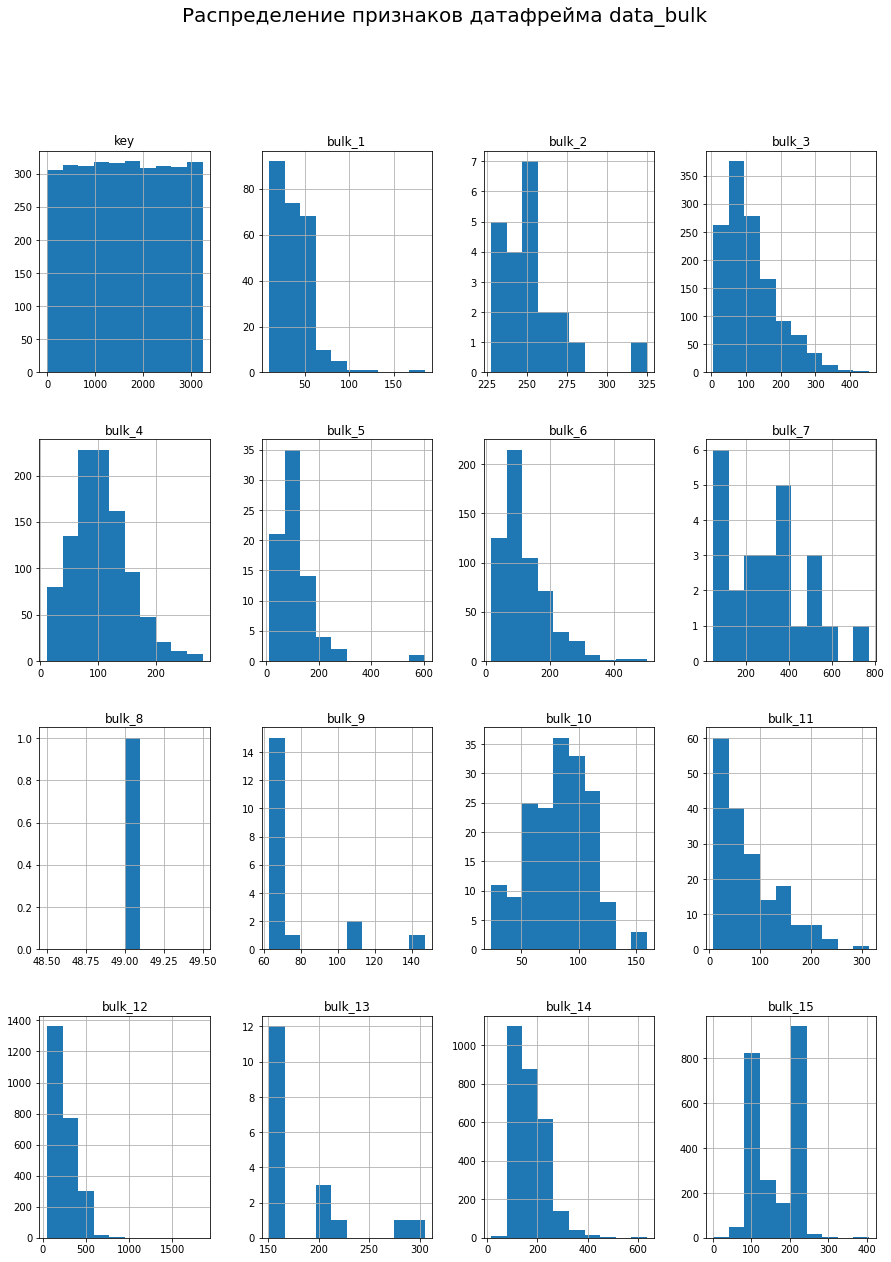

In [27]:
data_bulk.hist(grid=True, figsize=(15, 20))
plt.suptitle("Распределение признаков датафрейма data_bulk", fontsize =20)
plt.show()

#### Вывод по `data_bulk`

- Датафрейм `data_bulk` содержит обьем сыпучих материалов, которые добавляются в сплав. Так как это особенность технологического процесса, то и данные распределены неравномерно. 
- Скорее всего, пропуски значат, что сыпучие материалы не добавлялись, и NaN значения можно заменить 0-ми.



### Анализ датафрейма `data_bulk_time` *—* данные о подаче сыпучих материалов (время)

In [28]:
data_bulk_time.head(10)

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:28:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:24:31,NaN,2019-05-03 11:14:50,2019-05-03 11:10:43
1,2,NaN,NaN,NaN,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:53:30,NaN,2019-05-03 11:48:37,2019-05-03 11:44:39
2,3,NaN,NaN,NaN,2019-05-03 12:32:39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:27:13,NaN,2019-05-03 12:21:01,2019-05-03 12:16:16
3,4,NaN,NaN,NaN,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:58:00,NaN,2019-05-03 12:51:11,2019-05-03 12:46:36
4,5,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:30:47,NaN,2019-05-03 13:34:12,2019-05-03 13:30:47
5,6,NaN,NaN,NaN,2019-05-03 13:57:27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:48:52,NaN,2019-05-03 14:09:42,2019-05-03 14:03:15
6,7,NaN,NaN,NaN,2019-05-03 14:18:58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 14:41:26,NaN,2019-05-03 14:30:50,2019-05-03 14:27:16
7,8,NaN,NaN,NaN,2019-05-03 15:17:58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 15:17:58,NaN,2019-05-03 15:13:18,2019-05-03 15:05:33
8,9,NaN,NaN,NaN,2019-05-03 16:03:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 16:03:08,NaN,2019-05-03 16:00:16,2019-05-03 15:52:39
9,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 16:38:11,NaN,2019-05-03 16:34:24,2019-05-03 16:29:56


In [29]:
data_bulk_time.rename(columns = {'Bulk 1':'bulk_1',
                           'Bulk 2':'bulk_2',
                           'Bulk 3':'bulk_3',
                           'Bulk 4':'bulk_4',
                           'Bulk 5':'bulk_5',
                           'Bulk 6':'bulk_6',
                           'Bulk 7':'bulk_7',
                           'Bulk 8':'bulk_8',
                           'Bulk 9':'bulk_9',
                           'Bulk 10':'bulk_10',
                           'Bulk 11':'bulk_11',
                           'Bulk 12':'bulk_12',
                           'Bulk 13':'bulk_13',
                           'Bulk 14':'bulk_14',
                           'Bulk 15':'bulk_15',
                            }, inplace = True)

In [30]:
data_bulk_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   bulk_1   252 non-null    object
 2   bulk_2   22 non-null     object
 3   bulk_3   1298 non-null   object
 4   bulk_4   1014 non-null   object
 5   bulk_5   77 non-null     object
 6   bulk_6   576 non-null    object
 7   bulk_7   25 non-null     object
 8   bulk_8   1 non-null      object
 9   bulk_9   19 non-null     object
 10  bulk_10  176 non-null    object
 11  bulk_11  177 non-null    object
 12  bulk_12  2450 non-null   object
 13  bulk_13  18 non-null     object
 14  bulk_14  2806 non-null   object
 15  bulk_15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


In [31]:
data_bulk_time.describe()

,key
count,3129.000000
mean,1624.383509
std,933.337642
min,1.000000
25%,816.000000
50%,1622.000000
75%,2431.000000
max,3241.000000


In [32]:
data_bulk_time.isna().sum()

key           0
bulk_1     2877
bulk_2     3107
bulk_3     1831
bulk_4     2115
bulk_5     3052
bulk_6     2553
bulk_7     3104
bulk_8     3128
bulk_9     3110
bulk_10    2953
bulk_11    2952
bulk_12     679
bulk_13    3111
bulk_14     323
bulk_15     881
dtype: int64

In [33]:
data_bulk_time.duplicated().sum()

0

#### Вывод по `data_bulk_time`

- По результату проведенного анализа я делаю вывод, что данные по времени примерно совпадают с данными по объему. Считаю, что дополнительной предобработки не требуется.
- Пропуски можно заменить 0-ми.

### Анализ датафрейма `data_gas` — данные о продувке сплава газом;

In [34]:
data_gas.head(10)

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692
5,6,11.273392
6,7,9.836267
7,8,15.171553
8,9,8.216623
9,10,6.529891


In [35]:
data_gas.rename(columns = {'Газ 1':'gas_1'}, inplace = True)

In [36]:
data_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   gas_1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


In [37]:
data_gas.describe()

,key,gas_1
count,3239.000000,3239.000000
mean,1621.861377,11.002062
std,935.386334,6.220327
min,1.000000,0.008399
25%,812.500000,7.043089
50%,1622.000000,9.836267
75%,2431.500000,13.769915
max,3241.000000,77.995040


In [38]:
data_gas.isna().sum()

key      0
gas_1    0
dtype: int64

In [39]:
data_gas.duplicated().sum()

0

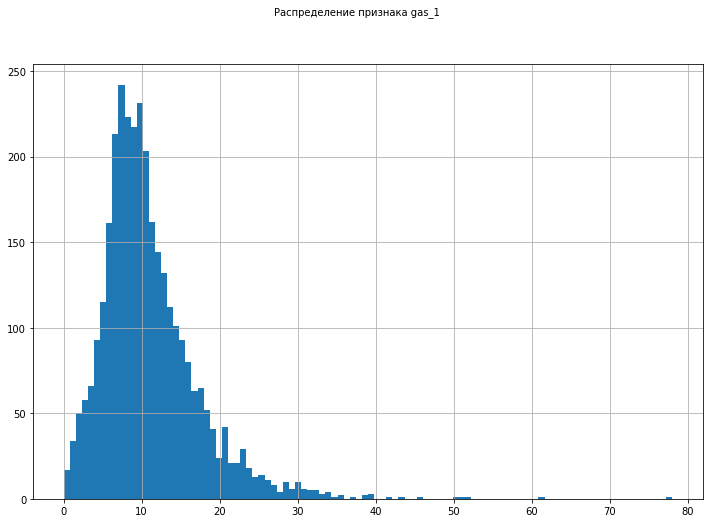

In [40]:
data_gas.gas_1.hist(grid=True, figsize=(12,8), bins=100)
plt.suptitle("Распределение признака gas_1", fontsize =10)
plt.show()

#### Вывод по `data_gas`

- В данных пропусков нет;
- Дубликаты отсутствуют;
- Распределение нормальное со сдигом влево.

### Анализ датафрейма `data_temp` — результаты измерения температуры

In [41]:
data_temp.head(10)

,key,Время замера,Температура
0,1,2019-05-03 11:02:04,1571.0
1,1,2019-05-03 11:07:18,1604.0
2,1,2019-05-03 11:11:34,1618.0
3,1,2019-05-03 11:18:04,1601.0
4,1,2019-05-03 11:25:59,1606.0
5,1,2019-05-03 11:30:38,1613.0
6,2,2019-05-03 11:34:04,1581.0
7,2,2019-05-03 11:38:40,1577.0
8,2,2019-05-03 11:46:09,1589.0
9,2,2019-05-03 11:49:38,1604.0


In [42]:
data_temp.rename(columns = {'Время замера':'time_measure',
                           'Температура':'temperature'}, inplace = True)

In [43]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18092 entries, 0 to 18091
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           18092 non-null  int64  
 1   time_measure  18092 non-null  object 
 2   temperature   14665 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 424.2+ KB


In [44]:
data_temp['time_measure'] = pd.to_datetime(data_temp['time_measure'], format='%Y-%m-%dT%H:%M:%S')

In [45]:
data_temp.isna().sum()

key                0
time_measure       0
temperature     3427
dtype: int64

In [46]:
data_temp.duplicated().sum()

0

In [47]:
data_temp.describe()

,key,temperature
count,18092.000000,14665.000000
mean,1616.460977,1590.722741
std,934.641385,20.394381
min,1.000000,1191.000000
25%,807.750000,1580.000000
50%,1618.000000,1590.000000
75%,2429.000000,1599.000000
max,3241.000000,1705.000000


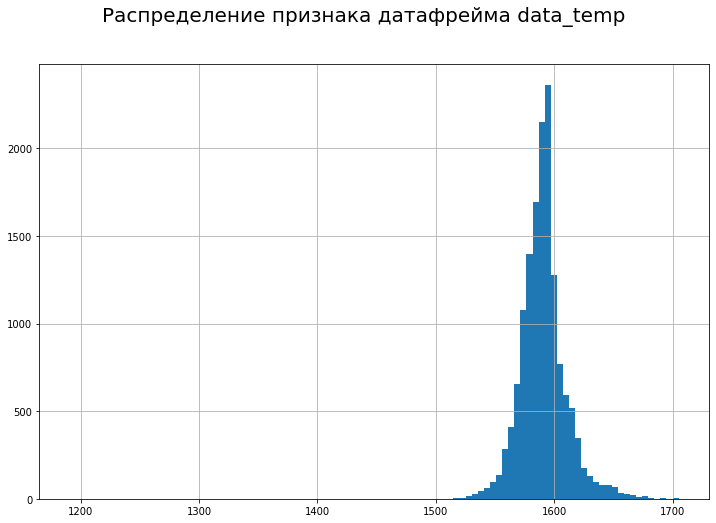

In [48]:
data_temp.temperature.hist(grid=True, figsize=(12,8), bins = 100)
plt.suptitle("Распределение признака датафрейма data_temp", fontsize =20)
plt.show()

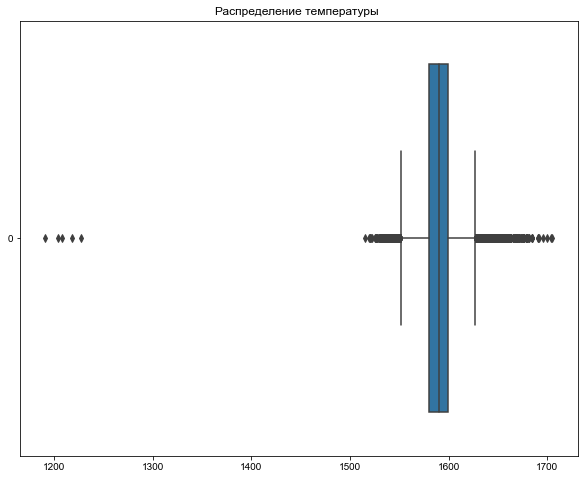

In [49]:
plt.figure(figsize=(10,8))
plt.title('Распределение температуры ')
concentration = sns.set_style('darkgrid')
concentration = sns.boxplot(data=data_temp.temperature, orient="h")

#### Вывод по `data_temp`

- Переименовал столбцы;
- Проверил на пропуски, их около 23%
- Так как это, скорее всего, таргет переменнная, то данные с пропусками брать не будем.
- Распределение нормальное.
- Так как происходят множество измерений температуры в одной партии, то необходимо брать первое и последнее измерение. Если есть пропуск в одном измерении партии, то удаляем измерения всей партии.
- Температура плавления стали от 1450 до 1520, поэтому значения ниже 1450 необходимо будет удалить, как и всю партию в которой было такое измерение.

### Анализ датафрейма `data_wire` — данные о проволочных материалах (объём)

In [50]:
data_wire.head(10)

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.114560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,99.109917,9.114560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,98.061600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,155.282394,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,113.393279,9.143681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,81.244796,12.376000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
data_wire.rename(columns = {'Wire 1':'wire_1',
                            'Wire 2':'wire_2',
                            'Wire 3':'wire_3',
                            'Wire 4':'wire_4',
                            'Wire 5':'wire_5',
                            'Wire 6':'wire_6',
                            'Wire 7':'wire_7',
                            'Wire 8':'wire_8',
                            'Wire 9':'wire_9'}, inplace = True)

In [52]:
data_wire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   wire_1  3055 non-null   float64
 2   wire_2  1079 non-null   float64
 3   wire_3  63 non-null     float64
 4   wire_4  14 non-null     float64
 5   wire_5  1 non-null      float64
 6   wire_6  73 non-null     float64
 7   wire_7  11 non-null     float64
 8   wire_8  19 non-null     float64
 9   wire_9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


In [53]:
data_wire.describe()

,key,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
count,3081.000000,3055.000000,1079.000000,63.000000,14.000000,1.000,73.000000,11.000000,19.000000,29.000000
mean,1623.426485,100.895853,50.577323,189.482681,57.442842,15.132,48.016974,10.039007,53.625193,34.155752
std,932.996726,42.012518,39.320216,99.513444,28.824667,NaN,33.919845,8.610584,16.881728,19.931616
min,1.000000,1.918800,0.030160,0.144144,24.148801,15.132,0.034320,0.234208,45.076721,4.622800
25%,823.000000,72.115684,20.193680,95.135044,40.807002,15.132,25.053600,6.762756,46.094879,22.058401
50%,1619.000000,100.158234,40.142956,235.194977,45.234282,15.132,42.076324,9.017009,46.279999,30.066399
75%,2434.000000,126.060483,70.227558,276.252014,76.124619,15.132,64.212723,11.886057,48.089603,43.862003
max,3241.000000,330.314424,282.780152,385.008668,113.231044,15.132,180.454575,32.847674,102.762401,90.053604


In [54]:
data_wire.isna().sum()

key          0
wire_1      26
wire_2    2002
wire_3    3018
wire_4    3067
wire_5    3080
wire_6    3008
wire_7    3070
wire_8    3062
wire_9    3052
dtype: int64

In [55]:
data_wire.duplicated().sum()

0

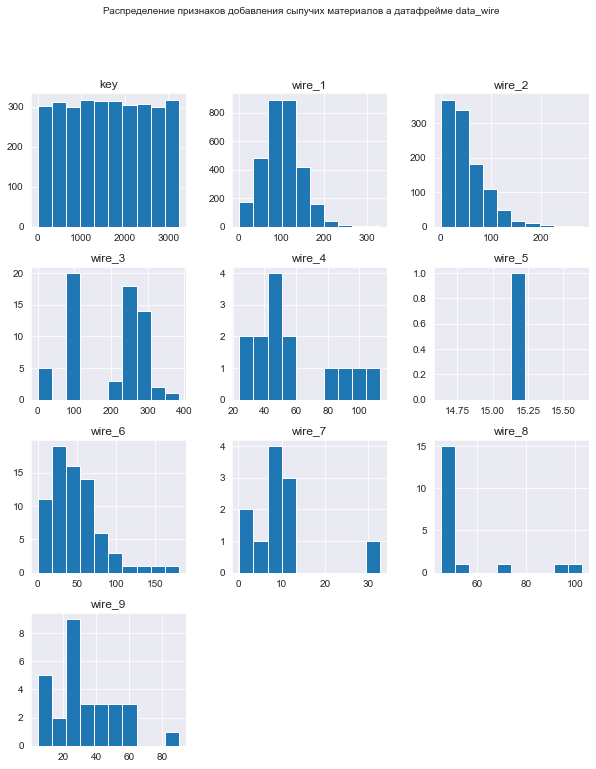

In [56]:
data_wire.hist(grid=True, figsize=(10, 12))
plt.suptitle("Распределение признаков добавления сыпучих материалов а датафрейме data_wire", fontsize =10)
plt.show()

#### Вывод по `data_wire`

- Переименовал столбцы;
- Пропуски пристутвуют из-за особенностей технологического процесса, так как могли и не добавляться проволочные материалы.

### Анализ датафрейма `data_wire_time` — данные о проволочных материалах (время)

In [57]:
data_wire_time.head(10)

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:06:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:36:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:11:46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:43:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:20:44,2019-05-03 13:15:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,2019-05-03 13:57:27,2019-05-03 13:48:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,2019-05-03 14:18:58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,2019-05-03 15:01:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,2019-05-03 15:45:44,2019-05-03 15:39:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,2019-05-03 16:27:00,2019-05-03 16:22:36,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
data_wire_time.rename(columns = {'Wire 1':'wire_1',
                            'Wire 2':'wire_2',
                            'Wire 3':'wire_3',
                            'Wire 4':'wire_4',
                            'Wire 5':'wire_5',
                            'Wire 6':'wire_6',
                            'Wire 7':'wire_7',
                            'Wire 8':'wire_8',
                            'Wire 9':'wire_9'}, inplace = True)

In [59]:
data_wire_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   wire_1  3055 non-null   object
 2   wire_2  1079 non-null   object
 3   wire_3  63 non-null     object
 4   wire_4  14 non-null     object
 5   wire_5  1 non-null      object
 6   wire_6  73 non-null     object
 7   wire_7  11 non-null     object
 8   wire_8  19 non-null     object
 9   wire_9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


In [60]:
data_wire_time['wire_1'] = pd.to_datetime(data_wire_time['wire_1'], format='%Y-%m-%dT%H:%M:%S')
data_wire_time['wire_2'] = pd.to_datetime(data_wire_time['wire_2'], format='%Y-%m-%dT%H:%M:%S')
data_wire_time['wire_3'] = pd.to_datetime(data_wire_time['wire_3'], format='%Y-%m-%dT%H:%M:%S')
data_wire_time['wire_4'] = pd.to_datetime(data_wire_time['wire_4'], format='%Y-%m-%dT%H:%M:%S')
data_wire_time['wire_5'] = pd.to_datetime(data_wire_time['wire_5'], format='%Y-%m-%dT%H:%M:%S')
data_wire_time['wire_6'] = pd.to_datetime(data_wire_time['wire_6'], format='%Y-%m-%dT%H:%M:%S')
data_wire_time['wire_7'] = pd.to_datetime(data_wire_time['wire_7'], format='%Y-%m-%dT%H:%M:%S')
data_wire_time['wire_8'] = pd.to_datetime(data_wire_time['wire_8'], format='%Y-%m-%dT%H:%M:%S')
data_wire_time['wire_9'] = pd.to_datetime(data_wire_time['wire_9'], format='%Y-%m-%dT%H:%M:%S')

In [61]:
data_wire_time.isna().sum()

key          0
wire_1      26
wire_2    2002
wire_3    3018
wire_4    3067
wire_5    3080
wire_6    3008
wire_7    3070
wire_8    3062
wire_9    3052
dtype: int64

In [62]:
data_wire_time.duplicated().sum()

0

#### Вывод по `data_wire_time`

Данные по времени примерно совпадают с данными по объему. Считаю, что дополнительной предобработки не требуется.

### Вывод по разделу:

- Загрузил все датасеты;
- Скорректировал типы данных;
- Проеврил все датафреймы на пропуски и дубликаты;
- построил гистограммы к каждому датафрейму.

### План работы:

- Загрузит все датафреймы с данными;
- Провести исследовательский анализ данных;
- Выполнить предобработку данных;
- Создать один полный датафрейм;
- Выделить целевой признак;
- Разделить на выборки;
- Обучить несколько моделей с подбором гиперпараметро ;
- Выбрать лучшую модель;
- Проверить ее на тестовой выборке;
- Подготовить отчет.

#### Прописал 3-5 основных шагов с небольшим пояснением.

1. Предобработка данных - устранить все пропуски и аномальные значения и свести все в общий датафрейм;
2. Выделить целевой признак и разделить на выборки;
3. Обучить модели с подбором гиперпараметров и выбрать модель с лучшей MAE меньше 6.8 и проверить ее на тестовой выборке.

### Цель проекта:


С помощью модели предсказывать температуру стали так, чтобы уменьшить энергопотребление на этапе ее обработки.

#### Уточняющие вопросы:

1. Можно ли отбросить датафреймы с данными о добавлении проволочных и сыпучих материалов;
2. Можно ли отбросить совсем маленькие данные о добавлении материалов;
3. Про создание общей таблицы по ключу.

## Предобработка данных

### Предобработка data_arc

При исследовательском анализе удалось узнать, что в реактивной мощности есть отрицательный выброс. Найдем его и удалим всю партию с этим значением.

In [63]:
data_arc.sort_values(by = 'reactive_power').head()

,key,arc_begin,arc_end,active_power,reactive_power
9780,2116,2019-07-28 02:22:08,2019-07-28 02:23:57,0.705344,-715.479924
709,152,2019-05-09 11:26:58,2019-05-09 11:29:41,0.228852,0.153777
3290,711,2019-05-31 07:16:01,2019-05-31 07:20:05,0.242989,0.153921
11794,2567,2019-08-13 05:51:16,2019-08-13 05:52:22,0.288314,0.155221
6130,1336,2019-06-22 15:46:26,2019-06-22 15:47:50,0.244191,0.156525


In [64]:
data_arc[data_arc['key']==2116]

,key,arc_begin,arc_end,active_power,reactive_power
9778,2116,2019-07-28 02:07:12,2019-07-28 02:09:14,0.787549,0.693881
9779,2116,2019-07-28 02:13:10,2019-07-28 02:15:25,0.580263,0.411498
9780,2116,2019-07-28 02:22:08,2019-07-28 02:23:57,0.705344,-715.479924
9781,2116,2019-07-28 02:29:11,2019-07-28 02:30:18,0.563641,0.408513


In [65]:
data_arc = data_arc[data_arc.key != 2116]

In [66]:
data_arc[data_arc['key']==2116]

,key,arc_begin,arc_end,active_power,reactive_power


In [67]:
data_arc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14872 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   key             14872 non-null  int64         
 1   arc_begin       14872 non-null  datetime64[ns]
 2   arc_end         14872 non-null  datetime64[ns]
 3   active_power    14872 non-null  float64       
 4   reactive_power  14872 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 697.1 KB


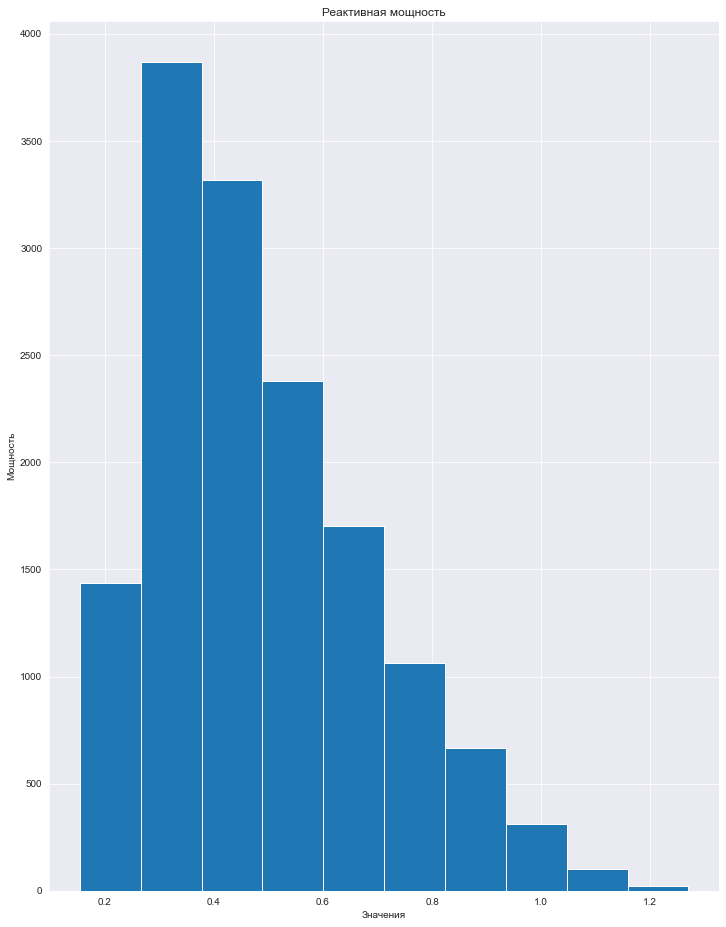

In [68]:
data_arc.reactive_power.hist(grid=True, figsize=(12,16))
plt.xlabel('Значения')
plt.ylabel('Мощность')
plt.title('Реактивная мощность')
plt.show()

Так же после удаления отрицательного выброса, проверим корреляцию между следующими признаками: активная и реактивная мощность. Если будет высокая корреляция между признаками, то практично будет создать новый признак и убрать лишнию корреляцию. 

In [69]:
print(data_arc['active_power'].corr(data_arc['reactive_power']))

0.9663821708188466


Корреляция оказалась высокой и добавление нового признака будет хорошим решением.

Создадим функцию вычесления полной мощности и добавим ее в датафрейм:

In [70]:
def full_power(data):
    full_power = (data['active_power']**2 + data['reactive_power']**2)**0.5
    return full_power

In [71]:
data_arc['full_power'] = data_arc.apply(full_power, axis=1)

Так же, можно создать признак общего время нагрева стали и переведем время в секунды:

In [72]:
data_arc['heating_seconds'] = data_arc['arc_end'] - data_arc['arc_begin']
data_arc['heating_seconds'] = data_arc['heating_seconds'].dt.seconds

In [73]:
data_arc.head(10)

,key,arc_begin,arc_end,active_power,reactive_power,full_power,heating_seconds
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.305130,0.211253,0.371123,228
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.765658,0.477438,0.902319,185
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.580313,0.430460,0.722536,172
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,0.518496,0.379979,0.642824,365
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.867133,0.643691,1.079934,148
5,2,2019-05-03 11:34:14,2019-05-03 11:36:31,0.381124,0.220351,0.440239,137
6,2,2019-05-03 11:38:50,2019-05-03 11:44:28,0.261665,0.205527,0.332731,338
7,2,2019-05-03 11:46:19,2019-05-03 11:48:25,0.710297,0.484962,0.860064,126
8,2,2019-05-03 11:49:48,2019-05-03 11:53:18,0.786322,0.542517,0.955315,210
9,3,2019-05-03 12:06:54,2019-05-03 12:11:34,1.101678,0.820856,1.373863,280


Так же порверим датафрейм на партии, в которых только один замер:

In [74]:
one_keys = pd.DataFrame()
one_keys['n_znach'] = data_arc.groupby('key')['key'].count() 
one_keys = one_keys.loc[one_keys['n_znach'] == 1]
print(one_keys)

      n_znach
key          
49          1
112         1
246         1
247         1
248         1
269         1
343         1
530         1
556         1
614         1
661         1
732         1
943         1
977         1
1169        1
1268        1
1281        1
1369        1
1449        1
1535        1
1568        1
1615        1
1766        1
1911        1
1914        1
1974        1
1988        1
2025        1
2112        1
2179        1
2194        1
2472        1
2582        1
2738        1
2795        1
2841        1
3026        1
3059        1
3112        1


In [75]:
values = [49, 112, 246, 247, 248, 269, 343, 530, 556, 614, 661, 943, 977, 1169, 1268, 1281, 1369, 1449, 1535, 1568, 1615, 1766, 1911, 1914, 1974, 1988, 2025, 2112, 2179, 2194, 2472, 2582, 2738, 2795, 2841, 3026, 3059, 3112]

In [76]:
data_arc = data_arc[data_arc.key.isin(values) == False]

In [77]:
data_arc = data_arc.groupby(by = 'key', as_index = False).sum()

In [78]:
data_arc.head(5)

,key,active_power,reactive_power,full_power,heating_seconds
0,1,3.036730,2.142821,3.718736,1098
1,2,2.139408,1.453357,2.588349,811
2,3,4.063641,2.937457,5.019223,655
3,4,2.706489,2.056992,3.400038,741
4,5,2.252950,1.687991,2.816980,869


In [79]:
data_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3175 entries, 0 to 3174
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   key              3175 non-null   int64  
 1   active_power     3175 non-null   float64
 2   reactive_power   3175 non-null   float64
 3   full_power       3175 non-null   float64
 4   heating_seconds  3175 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 124.1 KB


### Предобработка data_bulk

In [80]:
data_bulk.head()

,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


In [81]:
data_bulk.head(5)

,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0


In [82]:
data_bulk = data_bulk.fillna(0)

In [83]:
data_bulk.isna().sum()

key        0
bulk_1     0
bulk_2     0
bulk_3     0
bulk_4     0
bulk_5     0
bulk_6     0
bulk_7     0
bulk_8     0
bulk_9     0
bulk_10    0
bulk_11    0
bulk_12    0
bulk_13    0
bulk_14    0
bulk_15    0
dtype: int64

In [84]:
data_bulk = data_bulk.astype('int')

Отброшу материалы, у которых процент пропусков партий более 50%.

In [85]:
data_bulk = data_bulk[['key', 'bulk_12', 'bulk_14', 'bulk_15']]
data_bulk.head(5)

,key,bulk_12,bulk_14,bulk_15
0,1,206,150,154
1,2,206,149,154
2,3,205,152,153
3,4,207,153,154
4,5,203,151,152


### Предобработка data_temp

In [86]:
data_temp[data_temp['temperature'].isnull()].tail()

,key,time_measure,temperature
18087,3241,2019-09-06 16:55:01,NaN
18088,3241,2019-09-06 17:06:38,NaN
18089,3241,2019-09-06 17:21:48,NaN
18090,3241,2019-09-06 17:24:44,NaN
18091,3241,2019-09-06 17:30:05,NaN


In [87]:
data_temp.fillna(-1000, inplace= True)

In [88]:
temporary = data_temp.groupby('key')['temperature'].last().to_frame()

In [89]:
temporary1 = temporary.loc[temporary.loc[:, 'temperature'] == -1000]
temporary1

,temperature
key,
2500,-1000.0
2501,-1000.0
2502,-1000.0
2503,-1000.0
2504,-1000.0
...,...
3237,-1000.0
3238,-1000.0
3239,-1000.0


In [90]:
data_temp = data_temp.query('key < 2500')

In [91]:
data_temp.isna().sum()

key             0
time_measure    0
temperature     0
dtype: int64

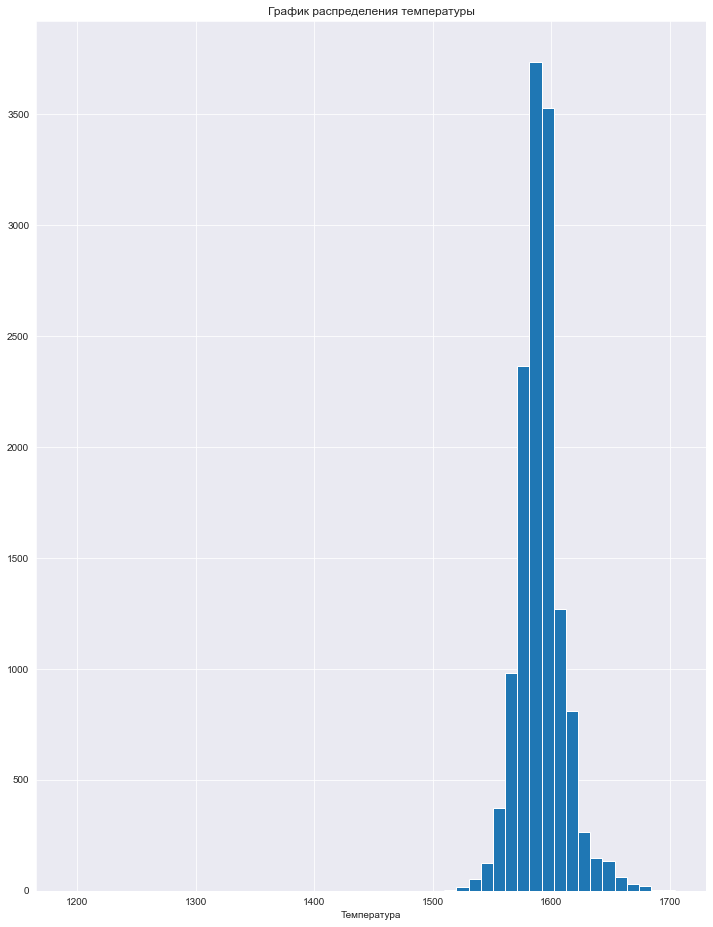

In [92]:
data_temp['temperature'].hist(figsize=(12,16), bins=50)
plt.xlabel('Температура')
plt.title('График распределения температуры')
plt.show()

In [93]:
data_temporary = data_temp.groupby(by = 'key').agg(['first', 'last']).reset_index()

In [94]:
data_temporary.columns = ['key', 'time_1', 'time_2', 'temp_start', 'temp_stop']

In [95]:
data_temporary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2477 entries, 0 to 2476
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   key         2477 non-null   int64         
 1   time_1      2477 non-null   datetime64[ns]
 2   time_2      2477 non-null   datetime64[ns]
 3   temp_start  2477 non-null   float64       
 4   temp_stop   2477 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 96.9 KB


In [96]:
data_temporary.head(10)

,key,time_1,time_2,temp_start,temp_stop
0,1,2019-05-03 11:02:04,2019-05-03 11:30:38,1571.0,1613.0
1,2,2019-05-03 11:34:04,2019-05-03 11:55:09,1581.0,1602.0
2,3,2019-05-03 12:06:44,2019-05-03 12:35:57,1596.0,1599.0
3,4,2019-05-03 12:39:27,2019-05-03 12:59:47,1601.0,1625.0
4,5,2019-05-03 13:11:03,2019-05-03 13:36:39,1576.0,1602.0
5,6,2019-05-03 13:46:41,2019-05-03 14:11:38,1543.0,1596.0
6,7,2019-05-03 14:16:36,2019-05-03 14:45:40,1586.0,1599.0
7,8,2019-05-03 14:53:46,2019-05-03 15:20:41,1577.0,1598.0
8,9,2019-05-03 15:36:33,2019-05-03 16:06:44,1587.0,1592.0
9,10,2019-05-03 16:13:59,2019-05-03 16:39:50,1574.0,1593.0


In [97]:
data_temporary.describe()

,key,temp_start,temp_stop
count,2477.000000,2477.000000,2477.000000
mean,1249.968510,1588.405733,1595.334275
std,720.073717,29.232904,16.019339
min,1.000000,1191.000000,1541.000000
25%,628.000000,1572.000000,1587.000000
50%,1251.000000,1588.000000,1593.000000
75%,1872.000000,1605.000000,1599.000000
max,2499.000000,1679.000000,1700.000000


In [98]:
data_temporary = data_temporary[data_temporary.temp_start > 1450]


In [99]:
data_temporary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2473 entries, 0 to 2476
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   key         2473 non-null   int64         
 1   time_1      2473 non-null   datetime64[ns]
 2   time_2      2473 non-null   datetime64[ns]
 3   temp_start  2473 non-null   float64       
 4   temp_stop   2473 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(1)
memory usage: 115.9 KB


### Предобработка data_wire

In [100]:
data_wire.head()

,key,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [101]:
data_wire = data_wire.fillna(0)

In [102]:
data_wire.head(5)

,key,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9
0,1,60.059998,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,96.052315,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,91.160157,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,89.063515,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,89.238236,9.11456,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [103]:
data_wire.isna().sum()

key       0
wire_1    0
wire_2    0
wire_3    0
wire_4    0
wire_5    0
wire_6    0
wire_7    0
wire_8    0
wire_9    0
dtype: int64

In [104]:
data_wire = data_wire[['key', 'wire_1']]
data_wire.head(5)

,key,wire_1
0,1,60.059998
1,2,96.052315
2,3,91.160157
3,4,89.063515
4,5,89.238236


### Промежуточный вывод:
- были убраны пропуски;
- в датафрейме data_arc были убраны аномальные значения и значения с 1 замером.
- в датафрецме data_temp были убраны аномальные значения.

## Подготовка полного датафрейма

In [105]:
full = (data_temporary.merge(data_arc, how = 'inner', on = 'key')
                 .merge(data_wire, how = 'inner', on = 'key')
                 .merge(data_bulk, how = 'inner', on = 'key')
                 .merge(data_gas, how = 'inner', on = 'key')
       )

In [106]:
full.head(10)

,key,time_1,time_2,temp_start,temp_stop,active_power,reactive_power,full_power,heating_seconds,wire_1,bulk_12,bulk_14,bulk_15,gas_1
0,1,2019-05-03 11:02:04,2019-05-03 11:30:38,1571.0,1613.0,3.036730,2.142821,3.718736,1098,60.059998,206,150,154,29.749986
1,2,2019-05-03 11:34:04,2019-05-03 11:55:09,1581.0,1602.0,2.139408,1.453357,2.588349,811,96.052315,206,149,154,12.555561
2,3,2019-05-03 12:06:44,2019-05-03 12:35:57,1596.0,1599.0,4.063641,2.937457,5.019223,655,91.160157,205,152,153,28.554793
3,4,2019-05-03 12:39:27,2019-05-03 12:59:47,1601.0,1625.0,2.706489,2.056992,3.400038,741,89.063515,207,153,154,18.841219
4,5,2019-05-03 13:11:03,2019-05-03 13:36:39,1576.0,1602.0,2.252950,1.687991,2.816980,869,89.238236,203,151,152,5.413692
5,6,2019-05-03 13:46:41,2019-05-03 14:11:38,1543.0,1596.0,2.725274,1.881313,3.313074,952,99.109917,204,201,154,11.273392
6,7,2019-05-03 14:16:36,2019-05-03 14:45:40,1586.0,1599.0,2.626877,1.960419,3.283913,673,98.061600,204,152,154,9.836267
7,8,2019-05-03 14:53:46,2019-05-03 15:20:41,1577.0,1598.0,2.678958,2.096952,3.405956,913,155.282394,410,252,153,15.171553
8,9,2019-05-03 15:36:33,2019-05-03 16:06:44,1587.0,1592.0,3.520820,2.527365,4.335261,625,113.393279,107,99,203,8.216623
9,10,2019-05-03 16:13:59,2019-05-03 16:39:50,1574.0,1593.0,3.118778,2.154941,3.791005,825,81.244796,203,102,204,6.529891


Уберем признаки, которые не будут полезны при обучении моделей:
- `key`;
- `time_1`;
- `time_2`;

и признаки, у которых сильная корреляция:
- `active_power`;
- `reactive_power`.

In [107]:
full = full.drop(['key',
                  'time_1',
                  'time_2',
                  'active_power',
                  'reactive_power'], axis = 1)

In [108]:
full.head(5)

,temp_start,temp_stop,full_power,heating_seconds,wire_1,bulk_12,bulk_14,bulk_15,gas_1
0,1571.0,1613.0,3.718736,1098,60.059998,206,150,154,29.749986
1,1581.0,1602.0,2.588349,811,96.052315,206,149,154,12.555561
2,1596.0,1599.0,5.019223,655,91.160157,205,152,153,28.554793
3,1601.0,1625.0,3.400038,741,89.063515,207,153,154,18.841219
4,1576.0,1602.0,2.816980,869,89.238236,203,151,152,5.413692


In [109]:
full.isna().sum()

temp_start         0
temp_stop          0
full_power         0
heating_seconds    0
wire_1             0
bulk_12            0
bulk_14            0
bulk_15            0
gas_1              0
dtype: int64

In [110]:
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2300 entries, 0 to 2299
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   temp_start       2300 non-null   float64
 1   temp_stop        2300 non-null   float64
 2   full_power       2300 non-null   float64
 3   heating_seconds  2300 non-null   int64  
 4   wire_1           2300 non-null   float64
 5   bulk_12          2300 non-null   int32  
 6   bulk_14          2300 non-null   int32  
 7   bulk_15          2300 non-null   int32  
 8   gas_1            2300 non-null   float64
dtypes: float64(5), int32(3), int64(1)
memory usage: 152.7 KB


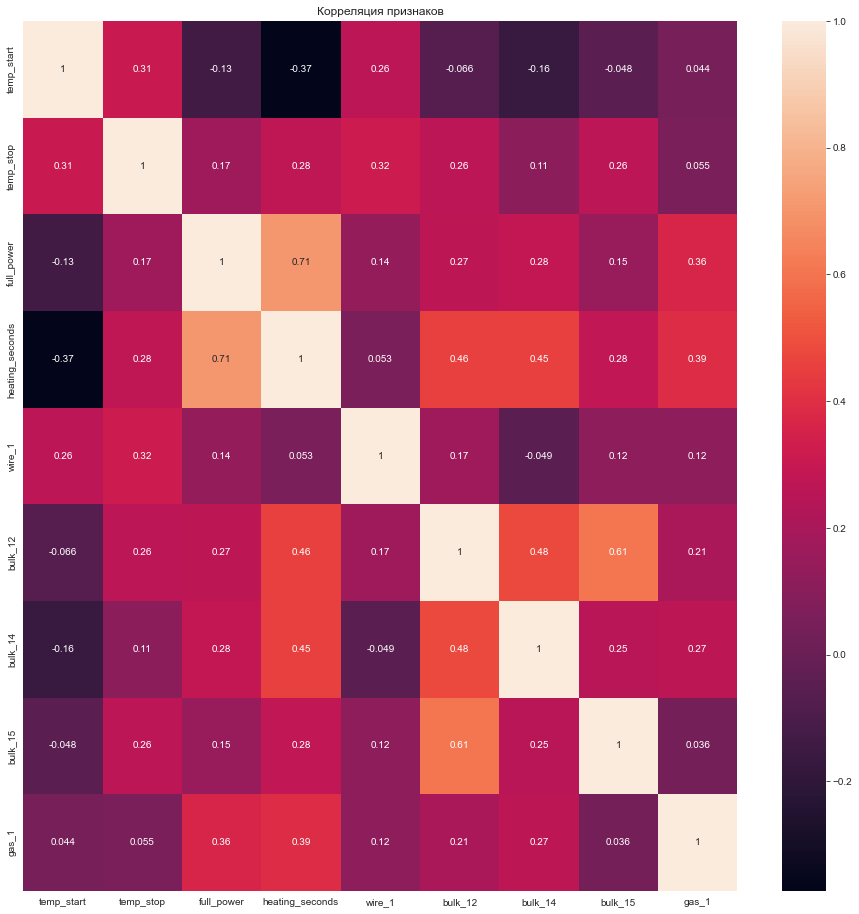

In [111]:
plt.figure(figsize=(16,16))
correlation_matrix = full.corr()
plt.title('Корреляция признаков')
sns.heatmap(correlation_matrix, annot = True);

In [112]:
features = full.drop(['temp_stop'], axis=1) 
target = full['temp_stop'] 
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target,
                                                                            test_size=0.25,
                                                                            random_state=random_state)

In [113]:
print('Train features', features_train.shape)
print('Train target', target_train.shape)
print('Test features', features_test.shape)
print('Test target', target_test.shape)

Train features (1725, 8)
Train target (1725,)
Test features (575, 8)
Test target (575,)


### Вывод по разделу

- Был создан полный датафрейм;
- Были убраны бесполезные признаки;
- Был выделен целевой признак;
- Датафрейм был разделен на выборки.

## Обучение моделей

Будем использовать следующие модели:

- CatBoostRegressor;
- DecisionTreeRegressor;
- RandomForest;
- LGBMRegressor.

### CatBoost

In [114]:
cat_boost = CatBoostRegressor(verbose=False)
hyperparams = {
    'loss_function':['MAE'],
    'depth': [5,8,10],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100,300,500],
    'random_state': [random_state]}
cat_boost = GridSearchCV(cat_boost, hyperparams, cv=5, verbose=0, scoring='neg_mean_absolute_error')
cat_boost.fit(features_train, target_train)
print('Лучшие параметры:', cat_boost.best_params_)
print('Значение MAE для DecisionTreeRegressor:', -cat_boost.best_score_)

Лучшие параметры: {'depth': 5, 'learning_rate': 0.05, 'loss_function': 'MAE', 'n_estimators': 300, 'random_state': 220523}
Значение MAE для DecisionTreeRegressor: 6.4951730209712775


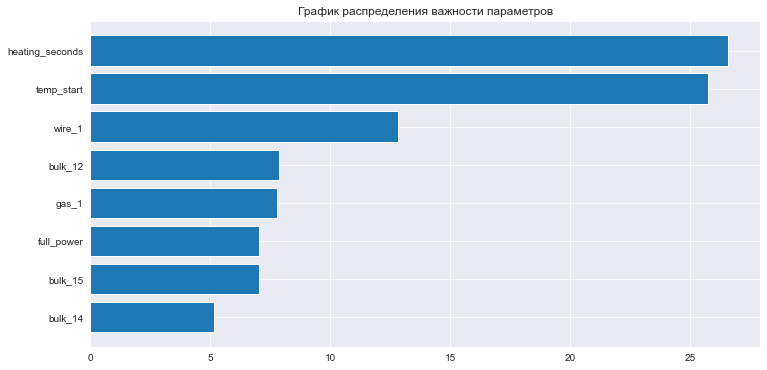

In [115]:
feature_importance = cat_boost.best_estimator_.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12,6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(features_train.columns)[sorted_idx])
plt.title('График распределения важности параметров')
plt.show()

Одни из самых важных признаков для модели это время и начало нагрева.

### DecisionTreeRegressor

In [116]:
%%time
DTR = DecisionTreeRegressor()
hyperparams = [{'max_depth': [1, 3, 5],
                'min_samples_leaf' : range(3,50),
                'max_leaf_nodes' : range(101,501,100),
                'min_samples_split' : [2,3,4,22,23,24],
                'min_samples_leaf' : [2,3,4,5,6,7],
                'random_state' : [random_state]}]
DTR = GridSearchCV(DTR, hyperparams, cv=3, verbose=False, scoring='neg_mean_absolute_error')
DTR.fit(features_train, target_train)
print('Лучшие параметры:', DTR.best_params_)
print('Значение MAE для DecisionTreeRegressor:', -DTR.best_score_)

Лучшие параметры: {'max_depth': 5, 'max_leaf_nodes': 101, 'min_samples_leaf': 7, 'min_samples_split': 24, 'random_state': 220523}
Значение MAE для DecisionTreeRegressor: 7.436875974622587
CPU times: total: 6.11 s
Wall time: 6.39 s


### RandomForest

In [117]:
RFR = RandomForestRegressor()
hyperparams = {'n_estimators': [10, 50, 100],
               'max_depth': range(5, 15),
               'min_samples_split': range(2, 10, 2),
               'random_state': [random_state]}
RFR = GridSearchCV(RFR, hyperparams, cv=3, scoring='neg_mean_absolute_error')
RFR.fit(features_train, target_train)
print('Лучшие параметры:', RFR.best_params_)
print('Значение MAE для RandomForest:', -RFR.best_score_)

Лучшие параметры: {'max_depth': 8, 'min_samples_split': 4, 'n_estimators': 100, 'random_state': 220523}
Значение MAE для RandomForest: 6.67782970917749


### LGBMRegressor

In [118]:
LGBM = LGBMRegressor()
hyperparams = {
    'metric': ['mae'],
    'max_depth': range(5, 10),  
    'num_leaves': [10, 50, 100],  
    'learning_rate': [0.01, 0.03, 0.05], 
    'random_state': [random_state]}

LGBM = GridSearchCV(LGBM, hyperparams, cv=3, verbose=0, scoring='neg_mean_absolute_error')
LGBM.fit(features_train, target_train)
print('Лучшие параметры:', LGBM.best_params_)
print('Значение MAE для LGBM:', -LGBM.best_score_)

Лучшие параметры: {'learning_rate': 0.05, 'max_depth': 8, 'metric': 'mae', 'num_leaves': 10, 'random_state': 220523}
Значение MAE для LGBM: 6.6278930294625775


### Таблица результатов обучения моделей:

In [119]:
result_table = pd.DataFrame({ 'Parameter':['MAE'],
                    'Decision Tree':[-DTR.best_score_],
                    'CatBoost':[-cat_boost.best_score_],
                    'Random Forest':[-RFR.best_score_],
                    'LGBM':[-LGBM.best_score_]
                })
result_table

,Parameter,Decision Tree,CatBoost,Random Forest,LGBM
0,MAE,7.436876,6.495173,6.67783,6.627893


### Проверка на тестовой выборке:

In [120]:
%%time
test_model = CatBoostRegressor(
    depth=5,
    learning_rate=0.05,
    loss_function='MAE',
    n_estimators=500,
    random_state=random_state,
    verbose = False
)

test_model.fit(features_train, target_train)
test_predictions = test_model.predict(features_test)
test_result = mean_absolute_error(target_test, test_predictions)
print('MAE на тестовой выборке:', test_result)


MAE на тестовой выборке: 6.254007645182684
CPU times: total: 2.14 s
Wall time: 1.31 s


### Промежуточный вывод:

Было обучено 4 модели:

- CatBoostRegressor;
- DecisionTreeRegressor;
- RandomForest;
- LGBMRegressor.

Самый лучший показатель MAE показала модель CatBoost.

На тестовой выборке модель показала MAE: 6.25. 

## Вывод по проекту:

В ходе работы:

- Были обработаны пропуски и аномальные значения;
- Были убраны признаки, которые не влияли бы на модель или влияли в худшую сторону;
- Были добавлены дополнительные признаки;
- Был подготовлен полный датафрейм;
- Были обучены 4 модели;
- Лучший показатель показала модель: `CatBoostRegressor`;
- Финальная модель ошибается приблизительно на `6.3` градуса;
- Модель подходит под условие MAE <= 6.8.